In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
base_path = './results'
model = 'trpo'
env = 'maml-halfcheetah-dir'

data = np.load(f'{base_path}/{model}/{env}/results.npz', allow_pickle=True)

In [48]:
train_returns = data['train_returns']
valid_returns = data['valid_returns']

print(train_returns.shape, valid_returns.shape)

meta_batch_size = 40

# Create batch indices
num_batches = len(valid_returns) // meta_batch_size 
batch_indices = np.arange(len(valid_returns)) // meta_batch_size

# Compute average return per batch
train_mean = np.array([train_returns[i * meta_batch_size:(i + 1) * meta_batch_size].mean() for i in range(num_batches)])
valid_mean = np.array([valid_returns[i * meta_batch_size:(i + 1) * meta_batch_size].mean() for i in range(num_batches)])

(200, 20) (200, 20)


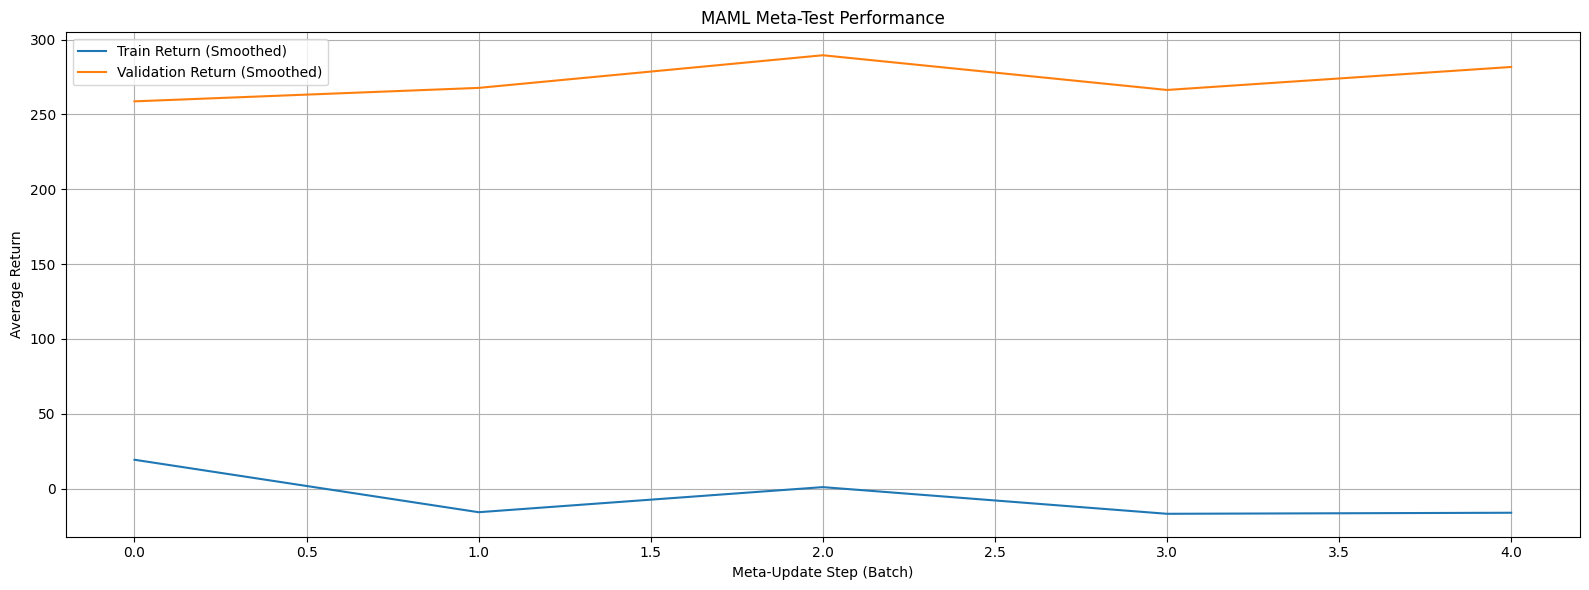

In [49]:
# Plotting
plt.figure(figsize=(16, 6))
plt.plot(train_mean, label='Train Return (Smoothed)')
plt.plot(valid_mean, label='Validation Return (Smoothed)')
plt.title('MAML Meta-Test Performance')
plt.xlabel('Meta-Update Step (Batch)')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

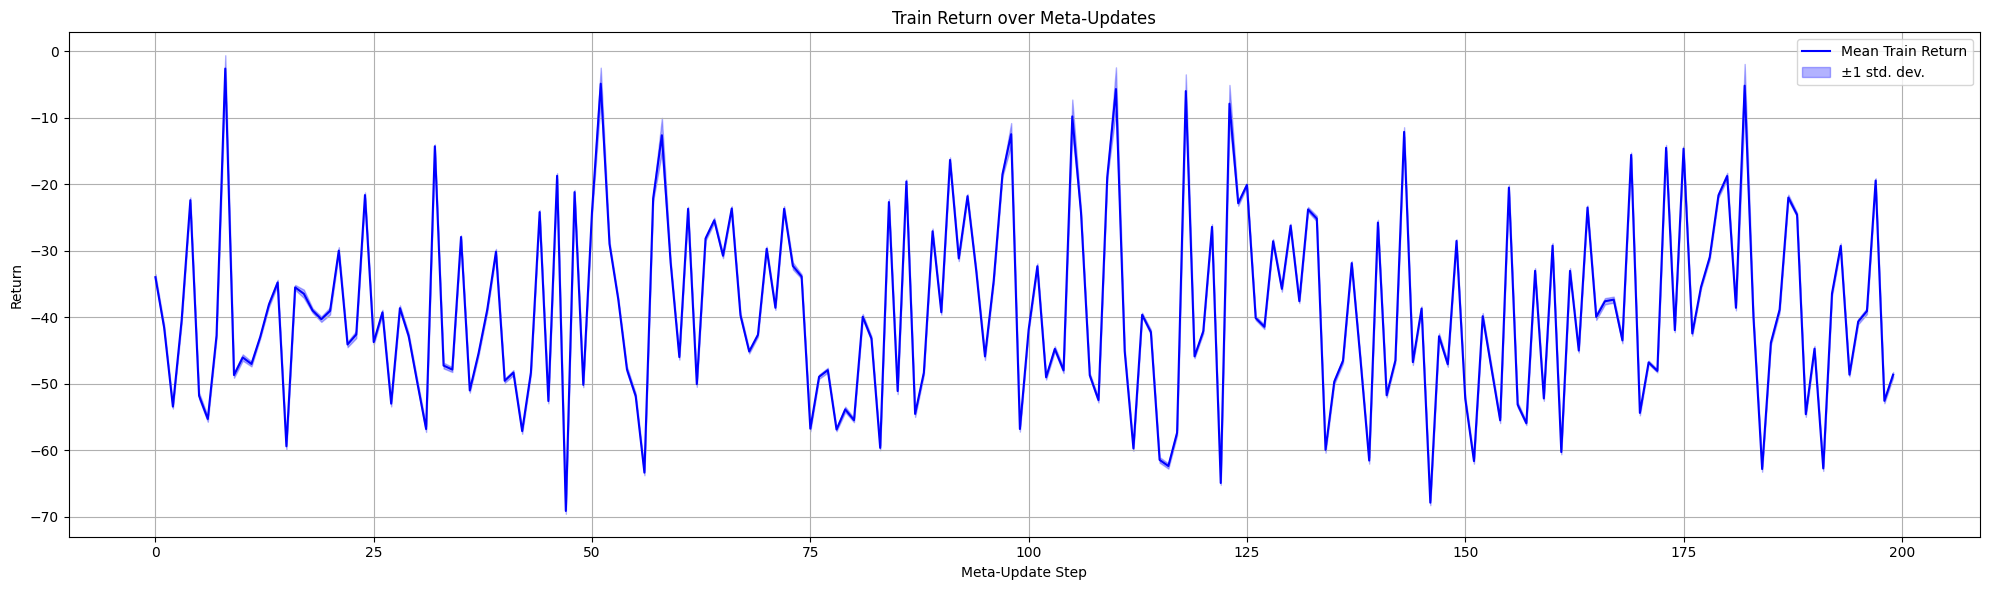

In [ ]:


mean_returns = train_returns.mean(axis=1)
std_returns = train_returns.std(axis=1)

# Plot with error bars
plt.figure(figsize=(20, 6))
plt.plot(mean_returns, label='Mean Train Return', color='blue')
plt.fill_between(range(len(mean_returns)),
                 mean_returns - std_returns,
                 mean_returns + std_returns,
                 alpha=0.3, color='blue', label='±1 std. dev.')
plt.title('Train Return over Meta-Updates')
plt.xlabel('Meta-Update Step')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()